x-intercept: 129.20


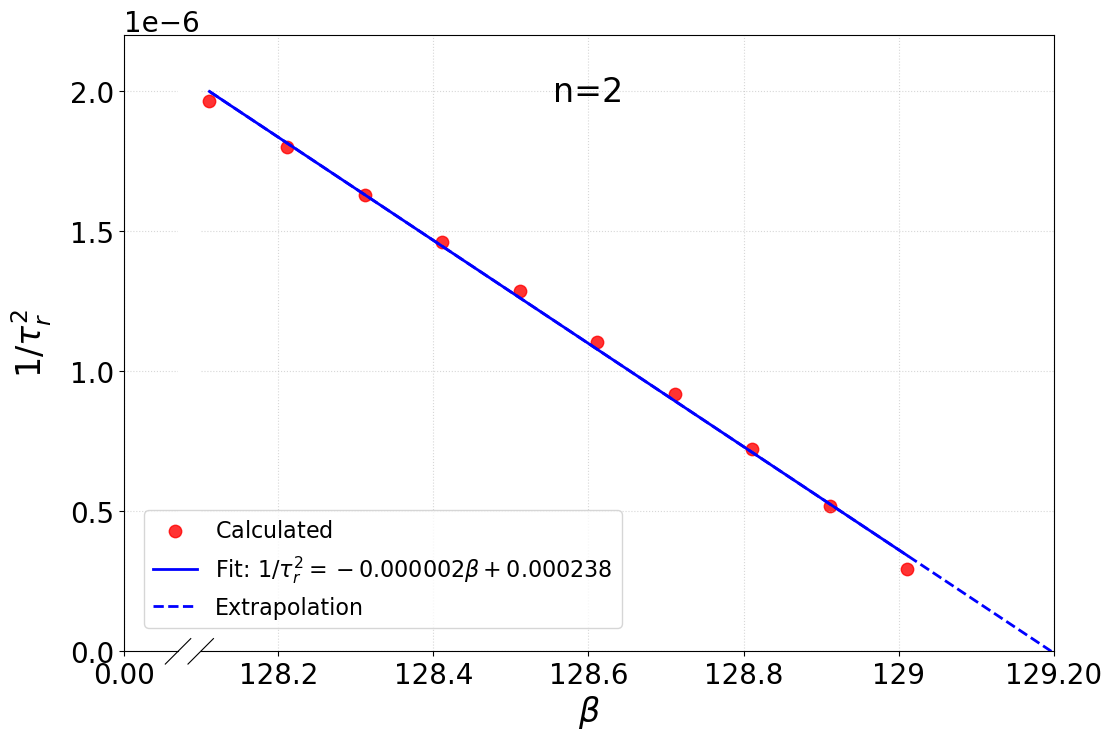

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FixedLocator
from brokenaxes import brokenaxes

# Increase the font size globally for all elements
plt.rc('font', size=20)  # This sets the default font size for text elements

# Function to read data from file
def read_data(filename):
    beta_values = []
    tau_values = []
    with open(filename, 'r') as file:
        for line in file:
            parts = line.strip().split(', ')
            if len(parts) >= 2:
                beta = float(parts[-2].split('=')[1].strip())
                tau = float(parts[-1].split('=')[1].strip())
                beta_values.append(beta)
                tau_values.append(tau)
    return beta_values, tau_values

# Read data from file
filename = 'data_tau_n=2.txt'
beta_values, tau_values = read_data(filename)

# Calculate 1/tau^2 values
inverse_tau_squared_values = [1/(tau**2) for tau in tau_values]

# Perform linear regression
coeffs = np.polyfit(beta_values, inverse_tau_squared_values, 1)
slope, intercept = coeffs

# Calculate x-intercept
x_intercept = -intercept / slope

# Generate points for the best-fit line, including extrapolation
x_fit = np.array([min(beta_values), max(beta_values)])
y_fit = slope * x_fit + intercept

# Create the plot
plt.figure(figsize=(12, 8))
brax = brokenaxes(xlims=((0, 0.07), (128.1, 129.2)), d=0.015, wspace=0.05) 

brax.set_ylim(0.0, 0.0000022)

# Plot data points as blue dots
brax.scatter(beta_values, inverse_tau_squared_values, s=80, c='red', alpha=0.8, label=r'$\text{Calculated}$')

# Plot the fit line as a solid blue line (only within the data range)
brax.plot(x_fit, y_fit, 'b-', linewidth=2, label=f'Fit: $1/\\tau_{{r}}^2 = {slope:.6f}\\beta + {intercept:.6f}$')

# Plot the extrapolation as a red dashed line
x_extrapolation = np.array([min(beta_values), x_intercept])
y_extrapolation = slope * x_extrapolation + intercept
brax.plot(x_extrapolation, y_extrapolation, 'b--', linewidth=2, label='Extrapolation')

#brax.text(157.5, 0.0000185, r'$\text{Extrapolated}~\beta^{(2)}_\text{crit}=161.09$',fontsize=18, 
#          color='black', ha='center', va='center', bbox=dict(boxstyle='round', facecolor='white', alpha=0.2))
brax.text(128.6, 0.0000020, 'n=2', fontsize=24, color='black', ha='center', va='center')
brax.set_xlabel(r'$\beta$', labelpad=30, fontsize=24)
brax.set_ylabel(r'$1/\tau_r^2$', labelpad=50, fontsize=24)
brax.grid(True, linestyle=':', alpha=0.5)
#legend = brax.legend(loc='upper right', bbox_to_anchor=(1, 0.9), fontsize=16)
legend = brax.legend(loc='lower left', bbox_to_anchor=(0.01, 0.02), fontsize=16)
brax.tick_params(labelsize=20) 

yticks=[0, 0.0000005, 0.000001, 0.0000015, 0.000002]

xticks2 = [128, 128.2, 128.4, 128.6, 128.8, 129, 129.2]
xticklabels2=['','128.2', '128.4', '128.6', '128.8', '129', '129.20']

xticks1=[0.0]
xticklabels1=['0.00']

brax.axs[0].xaxis.set_major_locator(FixedLocator(xticks1))
brax.axs[0].set_xticklabels(xticklabels1)
brax.axs[1].xaxis.set_major_locator(FixedLocator(xticks2))
brax.axs[1].set_xticklabels(xticklabels2)

# Adjust other axis properties
for ax in brax.axs:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(top=False, right=False)

    brax.big_ax.spines['top'].set_visible(True)
    brax.big_ax.spines['right'].set_visible(True)
    brax.big_ax.tick_params(top=False, right=False)
    ax.set_yticks(yticks)
    # You can uncomment the line below if you want to customize the y-tick labels.
    # ax.set_yticklabels(['$10^{'+str(int(np.log10(y)))+'}$' for y in ax.get_yticks()])

# Add text box with fit equation and x-intercept
equation = f'y = {slope:.6f}x + {intercept:.6f}'
x_intercept_text = f'x-intercept: {x_intercept:.2f}'
print(x_intercept_text)

plt.savefig('extrapolated_n=2_fit_tau_squared.jpg', dpi=300, bbox_inches='tight')
plt.show()


Linear fit for 1/τ vs β:
Equation: y = 9.130856e-04x + 5.465831e-04
Mean Squared Error: 2.070467e-09
Root Mean Squared Error: 4.550238e-05
R-squared: 0.970778

Linear fit for 1/τ² vs β:
Equation: y = 1.841769e-06x + 1.578197e-07
Mean Squared Error: 5.841329e-16
Root Mean Squared Error: 2.416884e-08
R-squared: 0.997917


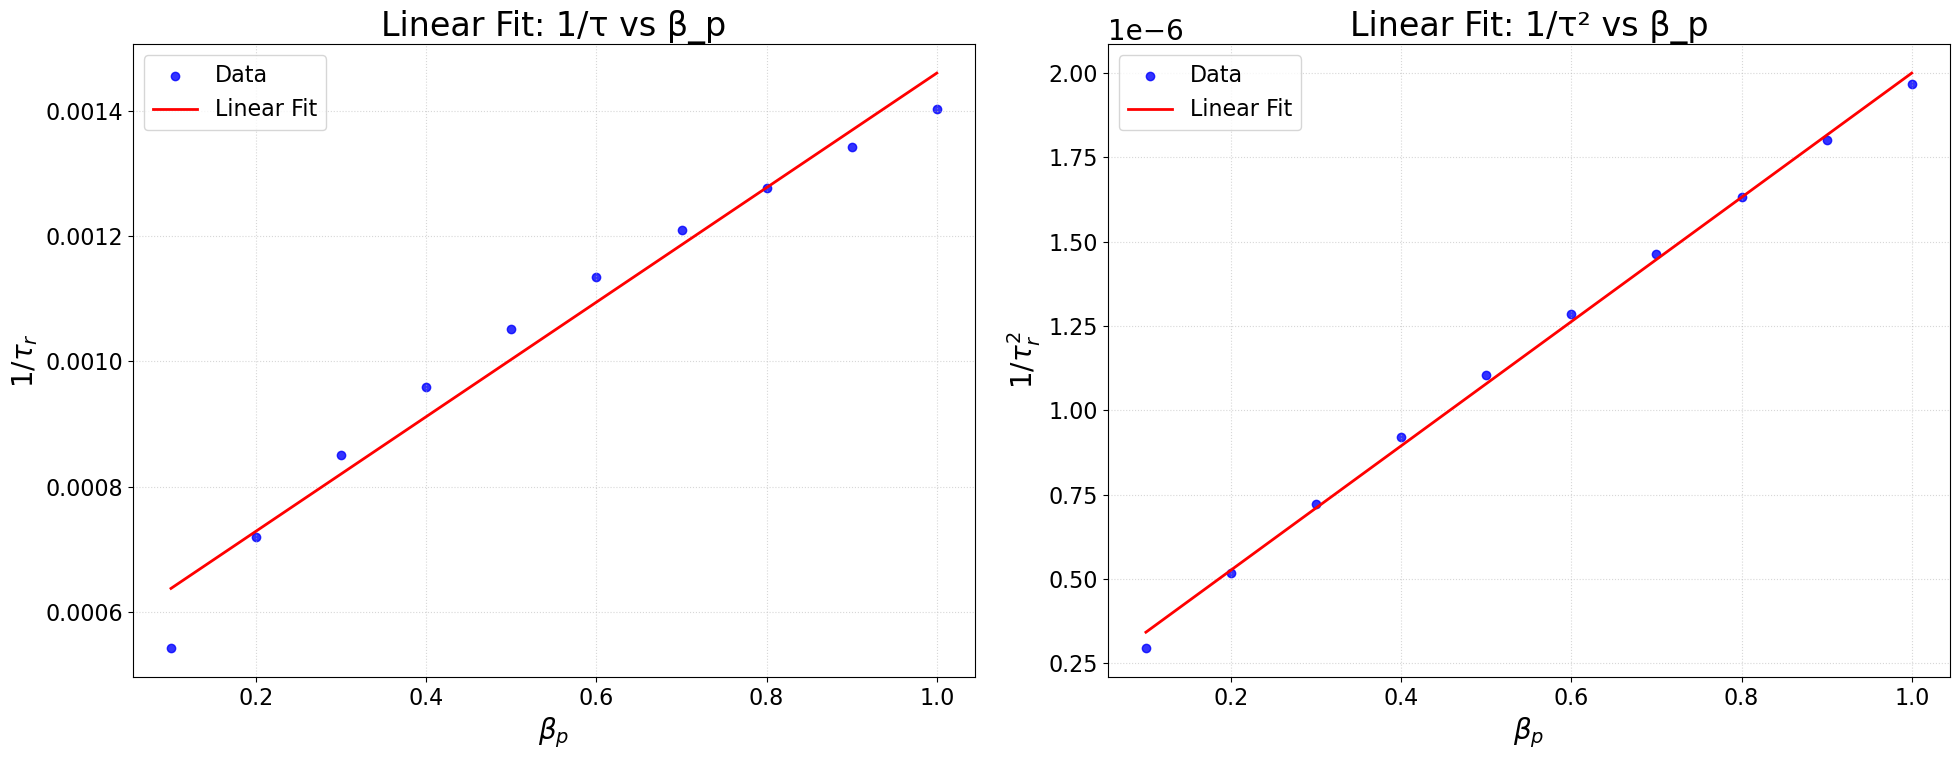

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def read_data(filename):
    betap_values = []
    tau_values = []
    with open(filename, 'r') as file:
        for line in file:
            parts = line.strip().split(', ')
            beta_p = None
            tau = None
            for part in parts:
                if 'beta_p' in part:
                    try:
                        beta_p = float(part.split('=')[1].strip())
                    except (ValueError, IndexError):
                        print(f"Warning: Could not parse beta_p in line: {line}")
                elif 'tau' in part:
                    try:
                        tau = float(part.split('=')[1].strip())
                    except (ValueError, IndexError):
                        print(f"Warning: Could not parse tau in line: {line}")
            if beta_p is not None and tau is not None:
                betap_values.append(beta_p)
                tau_values.append(tau)
    if not betap_values or not tau_values:
        raise ValueError("No valid data found in the file.")
    return np.array(betap_values), np.array(tau_values)

def linear_fit(x, y):
    coeffs = np.polyfit(x, y, 1)
    y_pred = np.polyval(coeffs, x)
    residuals = y - y_pred
    mse = np.mean(residuals**2)
    rmse = np.sqrt(mse)
    r_squared = 1 - (np.sum(residuals**2) / np.sum((y - np.mean(y))**2))
    return coeffs, y_pred, mse, rmse, r_squared

# Read data
filename = 'data_tau_n=2.txt'
betap_values, tau_values = read_data(filename)

# Calculate 1/τ and 1/τ² values
inverse_tau_values = 1 / tau_values
inverse_tau_squared_values = 1 / (tau_values**2)

# Perform linear fits
coeffs_tau, y_pred_tau, mse_tau, rmse_tau, r_squared_tau = linear_fit(betap_values, inverse_tau_values)
coeffs_tau_squared, y_pred_tau_squared, mse_tau_squared, rmse_tau_squared, r_squared_tau_squared = linear_fit(betap_values, inverse_tau_squared_values)

# Print results
print("Linear fit for 1/τ vs β:")
print(f"Equation: y = {coeffs_tau[0]:.6e}x + {coeffs_tau[1]:.6e}")
print(f"Mean Squared Error: {mse_tau:.6e}")
print(f"Root Mean Squared Error: {rmse_tau:.6e}")
print(f"R-squared: {r_squared_tau:.6f}")
print()
print("Linear fit for 1/τ² vs β:")
print(f"Equation: y = {coeffs_tau_squared[0]:.6e}x + {coeffs_tau_squared[1]:.6e}")
print(f"Mean Squared Error: {mse_tau_squared:.6e}")
print(f"Root Mean Squared Error: {rmse_tau_squared:.6e}")
print(f"R-squared: {r_squared_tau_squared:.6f}")

# Plot results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plot for 1/τ vs β
ax1.scatter(betap_values, inverse_tau_values, c='blue', alpha=0.8, label='Data')
ax1.plot(betap_values, y_pred_tau, 'r-', linewidth=2, label='Linear Fit')
ax1.set_xlabel(r'$\beta_p$', fontsize=20)
ax1.set_ylabel(r'$1/\tau_r$', fontsize=20)
ax1.set_title('Linear Fit: 1/τ vs β_p', fontsize=24)
ax1.grid(True, linestyle=':', alpha=0.5)
ax1.tick_params(axis='both', which='major', labelsize=16)
ax1.legend(fontsize=16)

# Plot for 1/τ² vs β
ax2.scatter(betap_values, inverse_tau_squared_values, c='blue', alpha=0.8, label='Data')
ax2.plot(betap_values, y_pred_tau_squared, 'r-', linewidth=2, label='Linear Fit')
ax2.set_xlabel(r'$\beta_p$', fontsize=20)
ax2.set_ylabel(r'$1/\tau_r^2$', fontsize=20)
ax2.set_title('Linear Fit: 1/τ² vs β_p', fontsize=24)
ax2.grid(True, linestyle=':', alpha=0.5)
ax2.tick_params(axis='both', which='major', labelsize=16)
ax2.legend(fontsize=16)

plt.tight_layout()
plt.savefig('comparison_n=2_fit_tau_squared_beta_p.jpg', dpi=300, bbox_inches='tight')
plt.show()

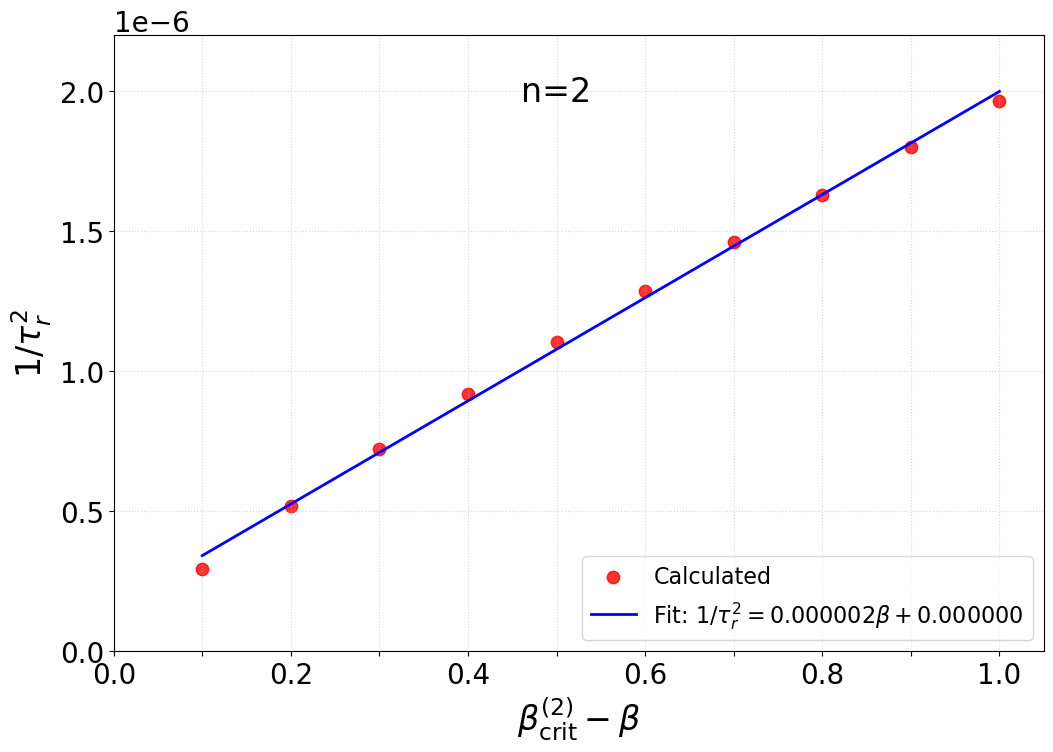

In [3]:
import matplotlib.pyplot as plt
import numpy as np

plt.rc('font', size=20)
# Function to read data from file
def read_data(filename):
    betap_values = []
    tau_values = []
    with open(filename, 'r') as file:
        for line in file:
            parts = line.strip().split(', ')
            beta_p = None
            tau = None
            for part in parts:
                if 'beta_p' in part:
                    try:
                        beta_p = float(part.split('=')[1].strip())
                    except (ValueError, IndexError):
                        print(f"Warning: Could not parse beta_p in line: {line}")
                elif 'tau' in part:
                    try:
                        tau = float(part.split('=')[1].strip())
                    except (ValueError, IndexError):
                        print(f"Warning: Could not parse tau in line: {line}")
            if beta_p is not None and tau is not None:
                betap_values.append(beta_p)
                tau_values.append(tau)
    if not betap_values or not tau_values:
        raise ValueError("No valid data found in the file.")
    return betap_values, tau_values

# Read data from file
filename = 'data_tau_n=2.txt'
betap_values, tau_values = read_data(filename)

# Calculate 1/tau^2 values
inverse_tau_squared_values = [1/(tau**2) for tau in tau_values]

# Perform linear regression
coeffs = np.polyfit(betap_values, inverse_tau_squared_values, 1)
slope, intercept = coeffs

# Generate points for the best-fit line
x_fit = np.array([min(betap_values), max(betap_values)])
y_fit = slope * x_fit + intercept

# Create the plot
plt.figure(figsize=(12, 8))
plt.scatter(betap_values, inverse_tau_squared_values, s=80, c='red', alpha=0.8, label='Calculated')
plt.plot(x_fit, y_fit, 'b-', linewidth=2, label=f'Fit: $1/\\tau_{{r}}^2 = {slope:.6f}\\beta + {intercept:.6f}$')

plt.xlabel(r'${\beta^{(2)}_\text{crit}-\beta}$', fontsize=24)
plt.ylabel(r'$1/\tau_r^2$', fontsize=24)
plt.grid(True, linestyle=':', alpha=0.5)
plt.text(0.5, 0.0000020, 'n=2', fontsize=24, color='black', ha='center', va='center')
legend = plt.legend(loc='lower right', bbox_to_anchor=(1, 0.001), fontsize=16)
plt.ylim(0, 0.0000022)
plt.xlim(0, 1.05)

# Set custom y-ticks and font size
y_tick_values = [0, 0.0000005, 0.000001, 0.0000015, 0.000002]
plt.yticks(y_tick_values, fontsize=20)
x_tick_values = [0.0, 0.1, 0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
plt.xticks(x_tick_values, ['0.0', '', '0.2','', '0.4','', '0.6','', '0.8','','1.0'], fontsize=20)



# Add text box with fit equation
equation = f'y = {slope:.6f}x + {intercept:.6f}'

plt.savefig('n=2_fit_tau_squared_beta_p.jpg', dpi=300, bbox_inches='tight')
plt.show()


x-intercept: 129.20


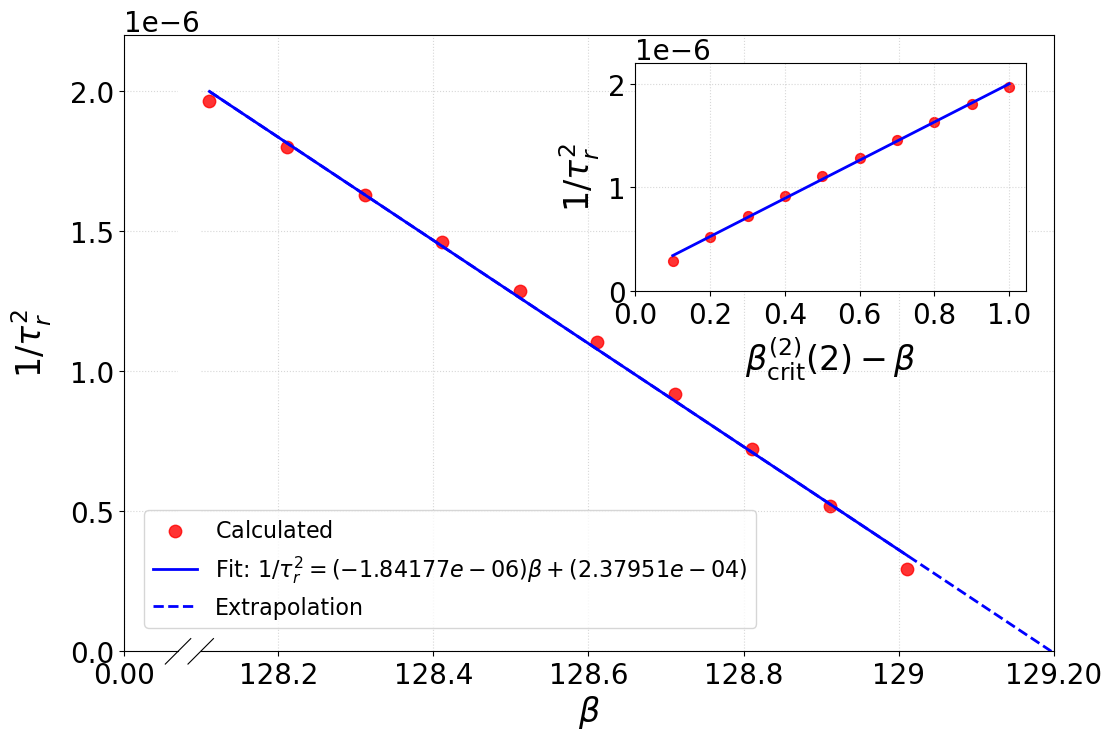

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FixedLocator
from brokenaxes import brokenaxes
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Increase the font size globally for all elements
plt.rc('font', size=20)  # This sets the default font size for text elements

# Function to read data from file
def read_data(filename):
    beta_values = []
    tau_values = []
    with open(filename, 'r') as file:
        for line in file:
            parts = line.strip().split(', ')
            if len(parts) >= 2:
                beta = float(parts[-2].split('=')[1].strip())
                tau = float(parts[-1].split('=')[1].strip())
                beta_values.append(beta)
                tau_values.append(tau)
    return beta_values, tau_values

# Read data from file
filename = 'data_tau_n=2.txt'
beta_values, tau_values = read_data(filename)

# Calculate 1/tau^2 values
inverse_tau_squared_values = [1/(tau**2) for tau in tau_values]

# Perform linear regression
coeffs = np.polyfit(beta_values, inverse_tau_squared_values, 1)
slope, intercept = coeffs

# Calculate x-intercept
x_intercept = -intercept / slope

# Generate points for the best-fit line, including extrapolation
x_fit = np.array([min(beta_values), max(beta_values)])
y_fit = slope * x_fit + intercept

# Create the plot
plt.figure(figsize=(12, 8))
brax = brokenaxes(xlims=((0, 0.07), (128.1, 129.2)), d=0.015, wspace=0.05) 

brax.set_ylim(0.0, 0.0000022)

# Plot data points as blue dots
brax.scatter(beta_values, inverse_tau_squared_values, s=80, c='red', alpha=0.8, label=r'$\text{Calculated}$')

# Plot the fit line as a solid blue line (only within the data range)
brax.plot(x_fit, y_fit, 'b-', linewidth=2, label=f'Fit: $1/\\tau_{{r}}^2 = ({slope:.5e})\\beta + ({intercept:.5e})$')


# Plot the extrapolation as a red dashed line
x_extrapolation = np.array([min(beta_values), x_intercept])
y_extrapolation = slope * x_extrapolation + intercept
brax.plot(x_extrapolation, y_extrapolation, 'b--', linewidth=2, label='Extrapolation')

#brax.text(157.5, 0.0000185, r'$\text{Extrapolated}~\beta^{(2)}_\text{crit}=161.09$',fontsize=18, 
#          color='black', ha='center', va='center', bbox=dict(boxstyle='round', facecolor='white', alpha=0.2))
#brax.text(128.6, 0.0000020, 'n=2', fontsize=24, color='black', ha='center', va='center')
brax.set_xlabel(r'$\beta$', labelpad=30, fontsize=24)
brax.set_ylabel(r'$1/\tau_r^2$', labelpad=50, fontsize=24)
brax.grid(True, linestyle=':', alpha=0.5)
#legend = brax.legend(loc='upper right', bbox_to_anchor=(1, 0.9), fontsize=16)
legend = brax.legend(loc='lower left', bbox_to_anchor=(0.01, 0.02), fontsize=16)
brax.tick_params(labelsize=20) 

yticks=[0, 0.0000005, 0.000001, 0.0000015, 0.000002]

xticks2 = [128, 128.2, 128.4, 128.6, 128.8, 129, 129.2]
xticklabels2=['','128.2', '128.4', '128.6', '128.8', '129', '129.20']

xticks1=[0.0]
xticklabels1=['0.00']

brax.axs[0].xaxis.set_major_locator(FixedLocator(xticks1))
brax.axs[0].set_xticklabels(xticklabels1)
brax.axs[1].xaxis.set_major_locator(FixedLocator(xticks2))
brax.axs[1].set_xticklabels(xticklabels2)

# Adjust other axis properties
for ax in brax.axs:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(top=False, right=False)

    brax.big_ax.spines['top'].set_visible(True)
    brax.big_ax.spines['right'].set_visible(True)
    brax.big_ax.tick_params(top=False, right=False)
    ax.set_yticks(yticks)
    # You can uncomment the line below if you want to customize the y-tick labels.
    # ax.set_yticklabels(['$10^{'+str(int(np.log10(y)))+'}$' for y in ax.get_yticks()])

# Add text box with fit equation and x-intercept
equation = f'y = {slope:.6f}x + {intercept:.6f}'
x_intercept_text = f'x-intercept: {x_intercept:.2f}'
print(x_intercept_text)


ax_inset = inset_axes(brax.big_ax, width="42%", height="37%", loc="upper right", borderpad=1)

def read_inset_data(filename):
    betap_values = []
    tau_values = []
    with open(filename, 'r') as file:
        for line in file:
            parts = line.strip().split(', ')
            beta_p = None
            tau = None
            for part in parts:
                if 'beta_p' in part:
                    try:
                        beta_p = float(part.split('=')[1].strip())
                    except (ValueError, IndexError):
                        print(f"Warning: Could not parse beta_p in line: {line}")
                elif 'tau' in part:
                    try:
                        tau = float(part.split('=')[1].strip())
                    except (ValueError, IndexError):
                        print(f"Warning: Could not parse tau in line: {line}")
            if beta_p is not None and tau is not None:
                betap_values.append(beta_p)
                tau_values.append(tau)
    if not betap_values or not tau_values:
        raise ValueError("No valid data found in the file.")
    return betap_values, tau_values

# Read data for the inset plot
betap_values, tau_values = read_inset_data(filename)

# Calculate 1/tau^2 values for the inset plot
inverse_tau_squared_values_inset = [1/(tau**2) for tau in tau_values]

# Perform linear regression for the inset plot
coeffs_inset = np.polyfit(betap_values, inverse_tau_squared_values_inset, 1)
slope_inset, intercept_inset = coeffs_inset

# Generate points for the best-fit line for the inset plot
x_fit_inset = np.array([min(betap_values), max(betap_values)])
y_fit_inset = slope_inset * x_fit_inset + intercept_inset

# Create the inset plot
ax_inset.scatter(betap_values, inverse_tau_squared_values_inset, s=50, c='red', alpha=0.8, label='Calculated')
ax_inset.plot(x_fit_inset, y_fit_inset, 'b-', linewidth=2, label=f'Fit: $1/\\tau_{{r}}^2 = {slope_inset:.6f}\\beta + {intercept_inset:.6f}$')

# Custom ticks for the inset
ax_inset.set_ylim(0, 0.0000022)

y_tick_values_inset = [0, 0.000001, 0.000002]
x_tick_values_inset= [0.0, 0.2, 0.4,  0.6, 0.8, 1.0]

ax_inset.set_yticks(y_tick_values_inset)
ax_inset.set_xticks(x_tick_values_inset)

# Adjust tick label size using tick_params
ax_inset.tick_params(axis='both', labelsize=20)

ax_inset.set_xlabel(r'${\beta^{(2)}_\text{crit}(2)-\beta}$', fontsize=24)
ax_inset.set_ylabel(r'$1/\tau_r^2$', fontsize=24)
ax_inset.grid(True, linestyle=':', alpha=0.5)

equation = f'y = {slope:.6f}x + {intercept_inset:.6f}'

plt.savefig('extrapolated_n=2_fit_tau_squared_with_inset.jpg', dpi=300, bbox_inches='tight')
plt.show()
